# <span style="color:Blue"><center>Personal Loan Modelling for Liable Customers</center></span>

## <span style="color:Blue">Introduction</span>

A client of US bank provides banking services. He is facing issue related to customers personal loan prediction.

- **In this project, I am going to predict which customer will take personal loan.**
- **I will use different classification models to differentiate people with buy loan vs the who will not buy loan.**

## <span style="color:Blue">Dataset</span>


The file contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

#### Attribute Information
 - ID         : Customer ID
 - Age        : Customer's age in completed years
 - Experience : No. of years of professional experience
 - Income     : Annual income of the customer ($ 000)
 
 - ZIP Code   : Home Address Zip Code
 - Family     : Family size of the customer
 - CCAvg      : Avg. Spending on Credit Card per Month ($ 000)
 
 - Education  : Education Level. 1: Undergrad; 2: Graduate; 3: Advanced / Professional
 - Mortgage   : Value of house mortgage if any. ($000)
 - Personal Loan : Did this customer accept the personal loan offered in the last campaign?
 - Securities Account : Does the customer have a securities account with the bank?
 - CD Account : Does the customer have a certificate of deposit (CD) account with the bank?
 - Online : Does the customer use internet banking facilities?
 - Credit card : Does the customer use a credit card issued by this Bank?

## <span style="color:Blue">Objective</span>

- I am interested in understanding the leading indicatior for interested customers for personal loan. 
- This will enable coustmers to take pre-emptive action such offering better plans to encouraging them to take personal loan.

## <span style="color:Blue">Libraries</span>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
print('Libraries imported')

Libraries imported


## <span style="color:Blue">Data Preparation</span>

In [2]:
# read csv file and create dataframe
bank_df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
# copy the dataframe for further use
df = bank_df.copy()
# showing 1st five rows of dataset
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


Family has 4 category(1,2,3,4), Education has 3 category(1,2,3), Securities Account has 2 category (Yes-1, No-0), CD Account has 2 category (Yes, No), Online has 2 category (Yes, No), Credit Card has 2 category (Yes, No)

In [4]:
# shape of data
print('Shape of data{}'.format(df.shape))
# total number of rows, shape[0] is used to get the rows
print("Number of rows:{}".format(df.shape[0]))
# total number of column, shape[1] is used to get the columns
print("Number of columns:{}".format(df.shape[1]))

Shape of data(5000, 14)
Number of rows:5000
Number of columns:14


In [5]:
# information of data, in terms of attributes, columns, 
# rows and type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


#### Observation

- We don't have any categoricals columns.
- There are 13 features and 5000 entires, all non-null. 
- All features are numerical features.

#### Missings And Duplicates Values

In [5]:
# print number of rows of each attributes for which the value is NULL.
print(df.isna().sum().sort_values(ascending = False))
print('Number of Duplicate Values in df : ' ,df.duplicated().sum() )

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64
Number of Duplicate Values in df :  0


There is not any missings values and also not any duplicaltes values.

#### Missing Data - Initial Intuition

Here, we don't have any missing data. In case of missing value, General Thumb Rules:

- __For features with less missing values__- We can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.

- __For features with very high number of missing values__- It is better to drop those columns as they give very less insight on analysis. As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally we can delete the columns, if we have more than 30-40% of missing values.

In [6]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

#### Dropping Unnecessary columns 'ID' and 'ZIP Code'

In [8]:
# Dropping Unnecessary columns 'ID' and 'ZIP Code'
df.drop(columns = ['ID' , 'ZIP Code'] , axis = 1 , inplace =True)

## <span style="color:Blue">EDA</span>

#### Target Variable is: Personal Loan

In [9]:
#create counts of df for plotting categorical variable- personal loan; 0-No, 1-Yes
loan = np.unique(df['Personal Loan'], return_counts=True)
print('loan = {}\n'.format(loan))

loan = (array([0, 1], dtype=int64), array([4520,  480], dtype=int64))



In [10]:
# create fontdicts for formatting figure text
axtitle_dict = {'family': 'serif','color':  'red','weight': 'bold','size': 16}
axlab_dict = {'family': 'serif', 'color': 'black','size': 14}

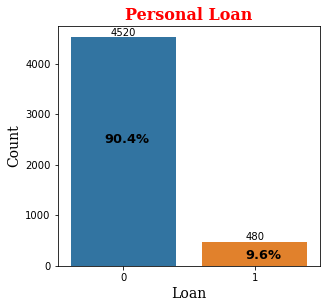

In [11]:
# Display a frequency distribution for Personal Loan. 
fig = plt.figure(figsize=[16,15]);
ax1 = fig.add_subplot(3, 3, 2);
sns.barplot(x=list(loan[0]), y=list(loan[1]), ax=ax1 );
#below two lines of codes of codes are for showing percentage values in bargraph
ax1.text(0.2, 2500, '{}%' .format(str(round(loan[1][0]/sum(loan[1])*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
ax1.text(1.2, 200, '{}%' .format(str(round(loan[1][1]/sum(loan[1])*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
ax1.set_title('Personal Loan', fontdict=axtitle_dict);
ax1.set_xlabel('Loan', fontdict=axlab_dict);
ax1.set_ylabel('Count', fontdict=axlab_dict);
ax1.bar_label(ax1.containers[0])
plt.show()

#### Insights of Barplot

Data is Highly Imblanaced. Majority of the data are class 0. Imblanaced ratio is ~90:10. Out of 5000 data 4520 is for not opting personal loan and 480 is for personal loan.


#### Filtering Numericals and Categoricals columns

In [12]:
# extracted categorical columns having non-unique value less than 5
categ_columns = []
for col in df.columns:
    if df[col].nunique()<=5:
        if col!='Personal Loan':
            categ_columns.append(col) 
print('categorical numericals columns are {}'.format(categ_columns))

categ numericals columns are ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


In [13]:
# extracted numerical columns
Num_cols = [col for col in df.columns if col not in categ_columns]
print('numericals columns are {}'.format(Num_cols)) 
Num_cols.pop() #Removing Personal Loan
Num_cols

numericals columns are ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Personal Loan']


['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

#### Indentifying Online Accounts

In [14]:
#create counts of df for plotting categorical variables
Online_account = np.unique(df['Online'], return_counts=True)
print('Online_account = {}\n'.format(Online_account))

Online_account = (array([0, 1], dtype=int64), array([2016, 2984], dtype=int64))



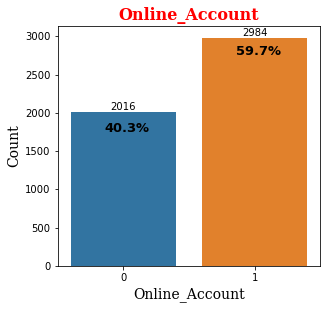

In [15]:
fig = plt.figure(figsize=[16,15]);
ax1 = fig.add_subplot(3, 3, 2);
sns.barplot(x=list(Online_account[0]), y=list(Online_account[1]), ax=ax1 );
#below two lines of codes of codes are for showing percentage values in bargraph
ax1.text(0.2, 1800, '{}%' .format(str(round(Online_account[1][0]/sum(Online_account[1])*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
ax1.text(1.2, 2800, '{}%' .format(str(round(Online_account[1][1]/sum(Online_account[1])*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
ax1.set_title('Online_Account', fontdict=axtitle_dict);
ax1.set_xlabel('Online_Account', fontdict=axlab_dict);
ax1.set_ylabel('Count', fontdict=axlab_dict);
ax1.bar_label(ax1.containers[0])
plt.show()

### <span style="color:forestgreen">Univariate Analysis - Numerical Attributes</span>

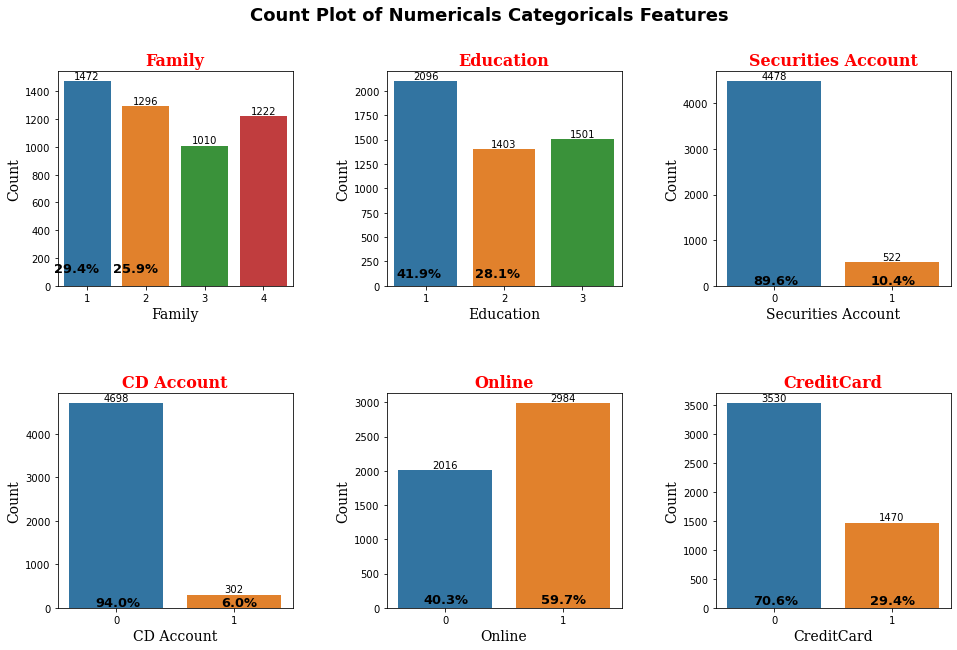

In [53]:
fig = plt.figure(figsize=[16,15])
fig.suptitle('Count Plot of Numericals Categoricals Features', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i , columns in enumerate(categ_columns):
    input = np.unique(df[columns] , return_counts = True)
    col= 'input'
    ax1 = fig.add_subplot(3, 3, i+1);
    ax1 = sns.barplot(x=list(eval(f'{col}[0]')), y=list(eval(f'{col}[1]')))
    #The below two lines of codes are used for percentage values.
    ax1.text(0.2, 120, '{}%' .format(str(round(eval(f'{col}[1][0]')/sum(eval(f'{col}[1]'))*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
    ax1.text(1.2, 120, '{}%' .format(str(round(eval(f'{col}[1][1]')/sum(eval(f'{col}[1]'))*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
    ax1.set_title(f'{columns}', fontdict=axtitle_dict)
    ax1.set_xlabel(f'{columns}', fontdict=axlab_dict)
    ax1.set_ylabel('Count', fontdict=axlab_dict)
    ax1.bar_label(ax1.containers[0])
#for showing percentage top of the bar we can increase 120

#### Distplot

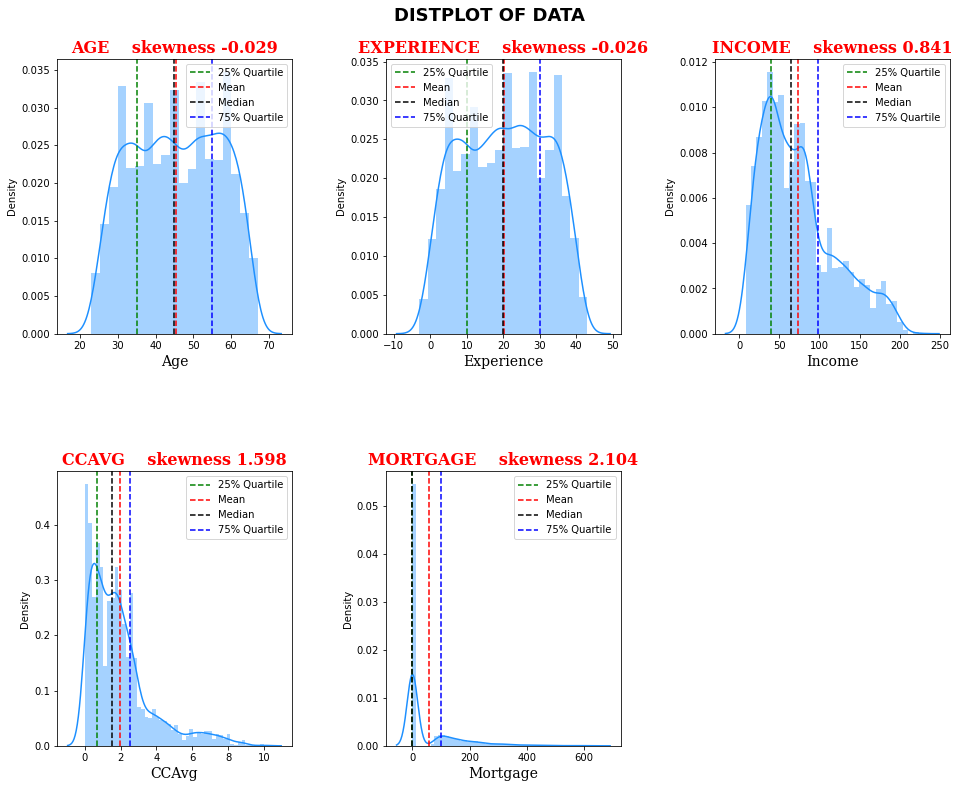

In [17]:
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[16,12])
fig.suptitle('DISTPLOT OF DATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols):
    ax = fig.add_subplot(2, 3, i+1)
    ax = sns.distplot(df[col],  color='dodgerblue')
    ax.axvline(df[col].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile')
    ax.axvline(df[col].mean(),color='red',linestyle='--',label='Mean')
    ax.axvline(df[col].median(),color='black',linestyle='--',label='Median')
    ax.axvline(df[col].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile')
    # ax.text('skewness: {}' .format(str(round(df[col].skew(),3))), ha='right', va='center', size=11)
    ax.set_xlabel(f'{col}', fontdict=axlab_dict)
    ax.set_title(f'{col.upper()}    skewness {round(df[col].skew(),3)}', fontdict=axtitle_dict)
    ax.legend(fontsize=10) 

In [18]:
colours = ['forestgreen','dodgerblue','goldenrod', 'coral' , 'silver' , 'gold' , 'dodgerblue'];

#### Outliers Detection

In [19]:
# Check of outliers by applying the IQR method checking if values are way outside the IQR borders.
# numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
df_num = df[Num_cols]
df_num.describe()

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
IQR
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any()

Age           False
Experience    False
Income         True
CCAvg          True
Mortgage       True
dtype: bool

#### Visualization of outliers using box plot

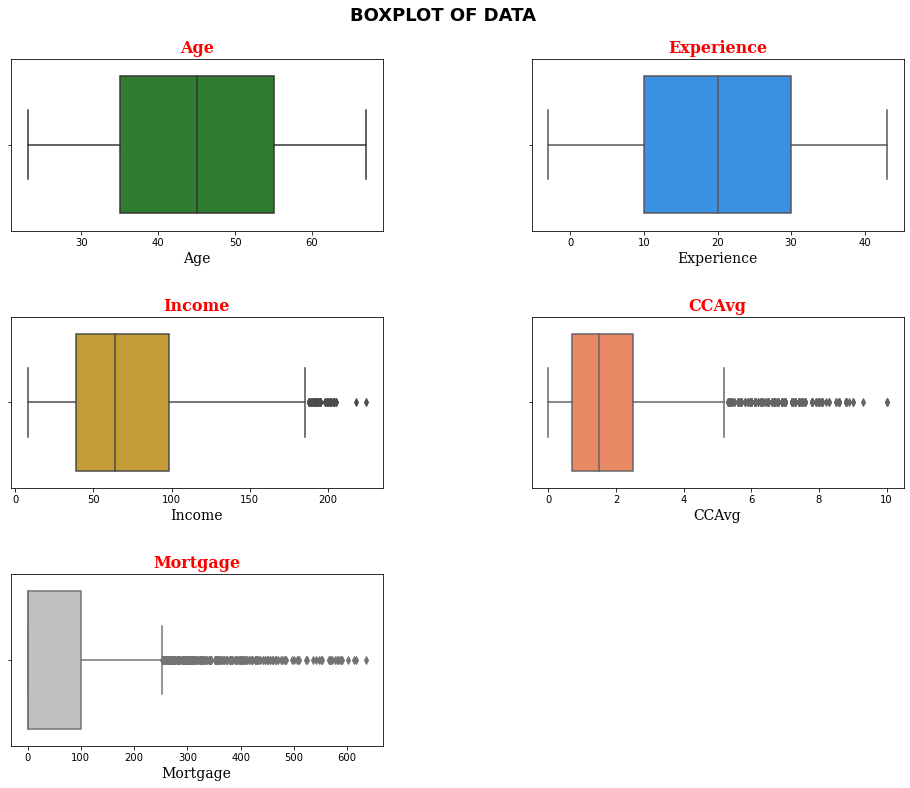

In [20]:
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[16,12])
fig.suptitle('BOXPLOT OF DATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols):  
    ax1 = fig.add_subplot(3, 2, i+1);
    ax1 = sns.boxplot(data = df, x=col ,  color= colours[i]);
 
    ax1.set_title(f'{col}', fontdict=axtitle_dict) 
    ax1.set_xlabel(f'{col}', fontdict=axlab_dict)

#### Outliers Detection

In [21]:
# Finding the IQR For Budget columns
dict = {}
for col in ['Income' , 'CCAvg' , 'Mortgage']:
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    IQR  = percentile75 - percentile25 
    upper_limit = percentile75 + 1.5 * IQR 
    lower_limit = percentile25 - 1.5 * IQR
    dict['upper_limit'+ '_' + col] = upper_limit
    dict['lower_limit'+ '_' + col] = lower_limit 

In Above code cell i just created a dictionary to keep upper_limit and lower_limit of Income , CCAvg , Mortgage.

In [22]:
dict

{'upper_limit_Income': 186.5,
 'lower_limit_Income': -49.5,
 'upper_limit_CCAvg': 5.2,
 'lower_limit_CCAvg': -2.0,
 'upper_limit_Mortgage': 252.5,
 'lower_limit_Mortgage': -151.5}

In [23]:
for col in ['Income' , 'CCAvg' , 'Mortgage']:
    print('There are total {} Customers data which {} are less than lower limit.'.format(len(df[df[col] < dict['lower_limit_' + col]] ) , col))
    print('There are total {} Customers data which {} are more than upper limit.'.format(len(df[df[col] > dict['upper_limit_' + col]] ) , col))


There are total 0 Customers data which Income are less than lower limit.
There are total 96 Customers data which Income are more than upper limit.
There are total 0 Customers data which CCAvg are less than lower limit.
There are total 324 Customers data which CCAvg are more than upper limit.
There are total 0 Customers data which Mortgage are less than lower limit.
There are total 291 Customers data which Mortgage are more than upper limit.


#### Capping Income , CCAvg and Mortgage with upper limit and lower limit.

In [24]:
for col in ['Income' , 'CCAvg' , 'Mortgage']:
    df[col] = np.where(
        df[col] > dict['upper_limit_' + col],
        dict['upper_limit_' + col],
        np.where(
            df[col] < dict['lower_limit_' + col],
            dict['lower_limit_' + col],
            df[col]  
        )
    )

#### After Outliers treatment

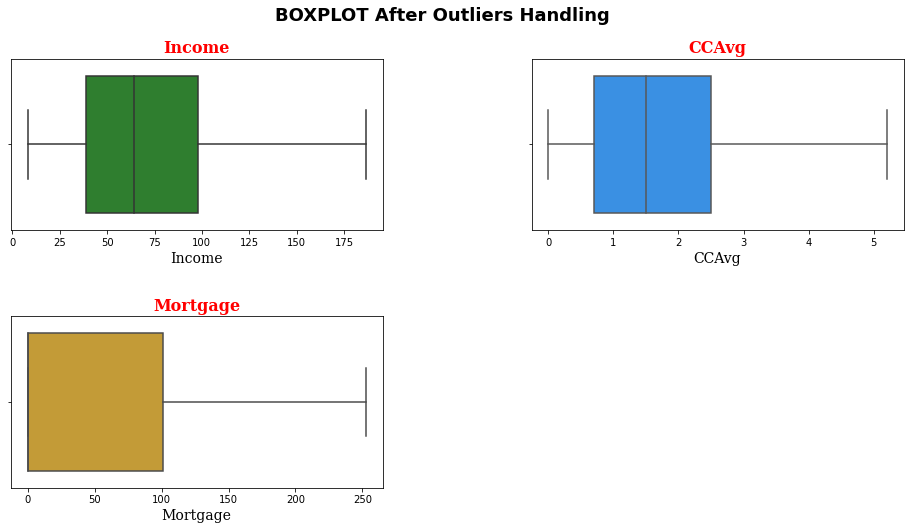

In [25]:
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[16,12])
fig.suptitle('BOXPLOT After Outliers Handling', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate( ['Income' , 'CCAvg' , 'Mortgage']):  
    ax1 = fig.add_subplot(3, 2, i+1);
    ax1 = sns.boxplot(data = df, x=col ,  color= colours[i]);
 
    ax1.set_title(f'{col}', fontdict=axtitle_dict) 
    ax1.set_xlabel(f'{col}', fontdict=axlab_dict)

### <span style="color:forestgreen">Bivariate Analysis</span>

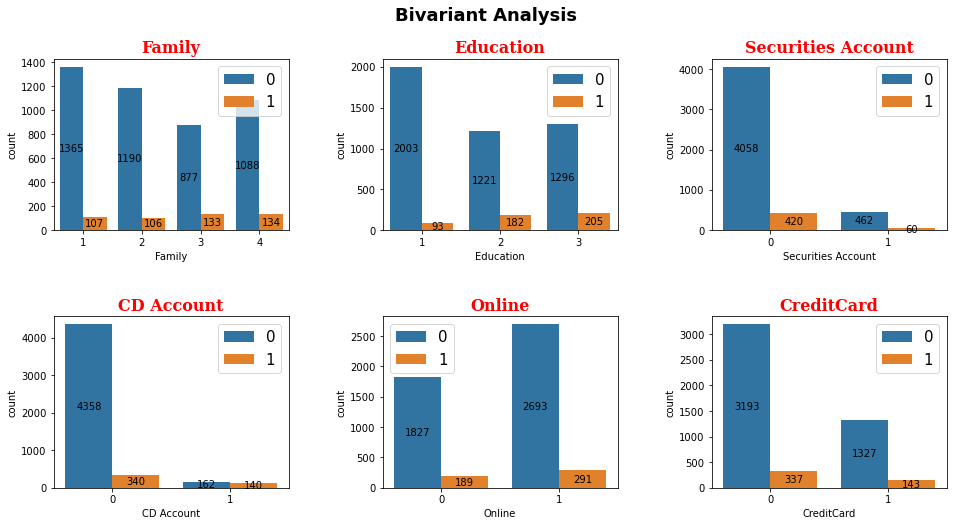

In [26]:
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[16,12])
fig.suptitle('Bivariant Analysis', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(categ_columns):
    a = fig.add_subplot(3, 3, i+1)
    a=sns.countplot(x = df[col] , ax=a , hue = df['Personal Loan'] )
    a.set_title(col , fontdict=axtitle_dict)
    a.bar_label(a.containers[0] , label_type='center') 
    a.bar_label(a.containers[1] , label_type='center')
    a.legend(fontsize=15)

**Plot Insights:**

- Highly educated customers seem to much interested in personal loan than lower educated customers.

- Customers without securites account seem to more interseted than not securities account customers in personal loan.

- Customers with CD Account have higher probablity to take personal loan in bar graph you can clearly see out of 163 cd account customers 140 is taken personal loan.

- Customers with Online internet banking are more intersted than non online customers in personal loan.

- Customers without Credit Card have much higher chance to take personal loan.

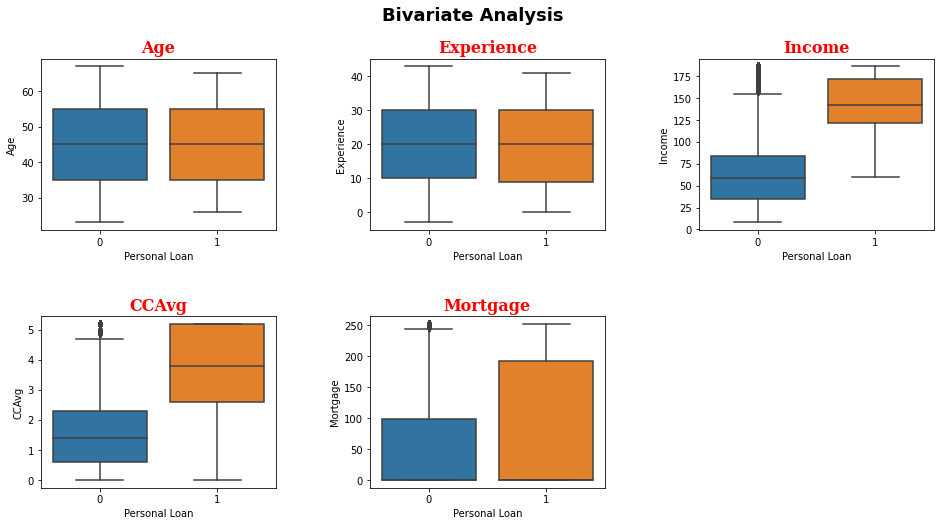

In [27]:
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[16,12])
fig.suptitle('Bivariate Analysis', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols):
    a = fig.add_subplot(3, 3, i+1)
    a=sns.boxplot(x = 'Personal Loan' , y =col , ax=a  , data = df )
    a.set_title(col , fontdict=axtitle_dict)

**Plot Insights:**

- Customers with personal loan Have Much higher Income with a median of 145 USD compared to a median of customers not opting for personal loan of median 55 USD.

- Customers who opted for personal loan have higher credit card avg spending with median 4 USD.

- Customers who opted for personal loan have slightly higher mortgate.

- Age and Experience doesn't have much effect on personal loan.

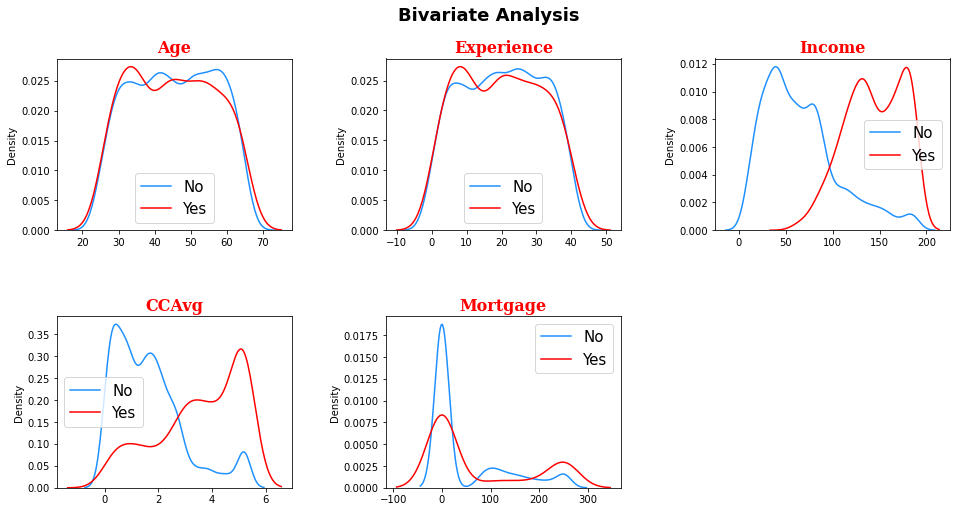

In [28]:
fig = plt.figure(figsize=[16,12])
fig.suptitle('Bivariate Analysis', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols):
    a = fig.add_subplot(3, 3, i+1)
    
    sns.distplot(x =df[df['Personal Loan']==0][col],  color='dodgerblue' , ax=a ,  hist =False)
    sns.distplot(x =df[df['Personal Loan']==1][col],  color='red' , ax=a , hist =False) 
    a.set_title(col , fontdict=axtitle_dict)    
    labels = ['No' , 'Yes']
    a.legend( labels  , fontsize = 15)

#### Creating Dummies for Categ columns

In [29]:
dum_df = pd.get_dummies(df , columns = categ_columns)
dum_df.head()

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Family_1,Family_2,Family_3,Family_4,...,Education_2,Education_3,Securities Account_0,Securities Account_1,CD Account_0,CD Account_1,Online_0,Online_1,CreditCard_0,CreditCard_1
0,25,1,49.0,1.6,0.0,0,0,0,0,1,...,0,0,0,1,1,0,1,0,1,0
1,45,19,34.0,1.5,0.0,0,0,0,1,0,...,0,0,0,1,1,0,1,0,1,0
2,39,15,11.0,1.0,0.0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,1,0
3,35,9,100.0,2.7,0.0,0,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
4,35,8,45.0,1.0,0.0,0,0,0,0,1,...,1,0,1,0,1,0,1,0,0,1


### <span style="color:forestgreen">Correlation Analysis</span>

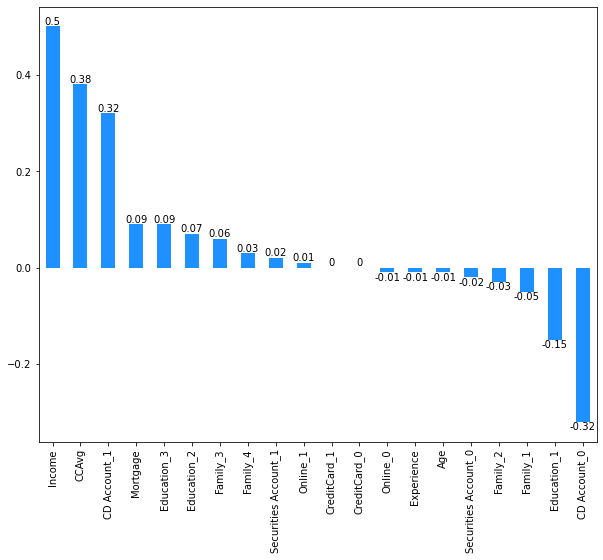

In [30]:
ax = round(dum_df.corr()['Personal Loan'].sort_values(ascending = False)[1:] ,2 ).plot(kind = 'bar' ,color='dodgerblue' , figsize = (10,8))
ax.bar_label(ax.containers[0])
plt.show()

### <span style="color:forestgreen">Heatmap</span>

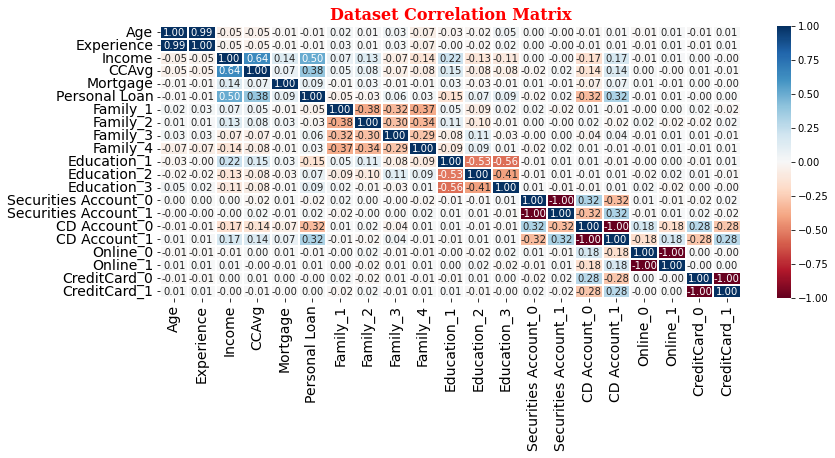

In [31]:
# plot correlation matrix heatmap
fig, ax = plt.subplots(figsize=[13,5])
sns.heatmap(dum_df.corr(), ax=ax,  annot=True, linewidths=0.05, fmt= '.2f',cmap='RdBu')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('Dataset Correlation Matrix', fontdict=axtitle_dict)
fig.show()

## <span style="color:Blue">Modelling</span>

In [32]:
X = dum_df.drop('Personal Loan' , 1 )
y = dum_df['Personal Loan']

In [33]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y  ,test_size = 0.33 , random_state = 42)

In [34]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape 

((3350, 20), (3350,), (1650, 20), (1650,))

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import recall_score , classification_report , confusion_matrix  ,roc_curve , roc_auc_score , accuracy_score
from sklearn.metrics import precision_recall_curve , auc ,f1_score , plot_confusion_matrix , precision_score , recall_score
from sklearn.tree import DecisionTreeClassifier

In [36]:
model_list = []
accuracy_list = []
recall_list = []
precision_list = []
f1_score_list= [] 

In [37]:
def Model_features(X_train , y_train , X_test , y_test , y_pred , classifier  , model_name):
#     fig ,ax = plt.subplots(figsize = (7,6))
    accuracy , precision , recall , f1_s = round(accuracy_score(y_test , y_pred) , 3) , round(precision_score(y_test, y_pred, average="micro")  ,3), round(recall_score(y_test , y_pred) ,3), round(f1_score(y_test , y_pred) , 3)
    print(f'Accuracy Score is :{accuracy}')
    print(f'Precision Score is :{precision}')
    print(f'Recall Score is :{recall}')
    print(f'f1  Score is :{f1_s}')
    model_list.append(model_name)
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_score_list.append(f1_s)
    
#     print(f'f1  Score is :{round(specificity_score(y_test , y_pred) , 3)}')
    print(metrics.classification_report(y_test, y_pred)) 

#### Features Importanaces

In [38]:
# Define a function that plots the feature weights for a classifier.
def feature_weights(X_df, classifier, classifier_name):
    weights = round(pd.Series(classifier.coef_[0], index=X_df.columns.values).sort_values(ascending=False) ,2 )
    
    top_weights_selected = weights[:5]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)#plt.xlabel(fontsize=10)
    plt.title(f'{classifier_name} - Top 5 Features')
    ax = top_weights_selected.plot(kind="bar")
    ax.bar_label(ax.containers[0])
    
    return print("")

In [39]:
def confusion_matrix_plot(X_test , y_test , classifier ,classifier_name):
    ax = plot_confusion_matrix(classifier, X_test, y_test, display_labels=["No Personal Loan", "Personal Loan"], cmap=plt.cm.Blues, normalize='true')


#### Logistic Regression

In [40]:
model_lr= LogisticRegression(random_state=0)  
model_lr.fit(X_train, y_train) 
y_pred = model_lr.predict(X_test)
model_lr.score(X_test , y_test)

0.9666666666666667

Accuracy Score is :0.967
Precision Score is :0.967
Recall Score is :0.747
f1  Score is :0.822
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1480
           1       0.91      0.75      0.82       170

    accuracy                           0.97      1650
   macro avg       0.94      0.87      0.90      1650
weighted avg       0.97      0.97      0.97      1650




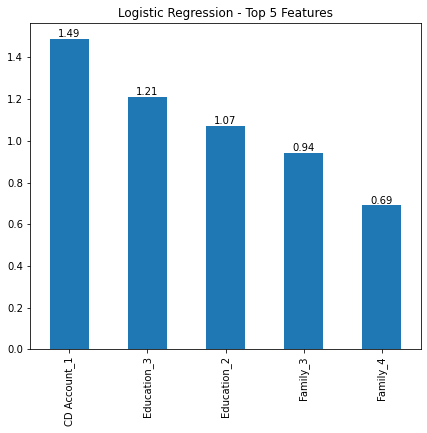

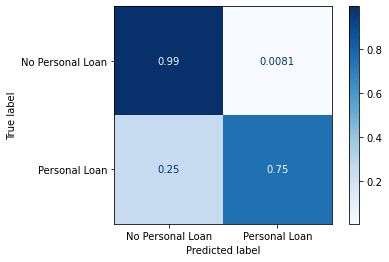

In [41]:
Model_features(X_train , y_train , X_test , y_test  , y_pred , model_lr , "Logistic Reegression")   
feature_weights(X_train , model_lr , "Logistic Regression")
confusion_matrix_plot(X_test , y_test , model_lr , "Logistic Regression")

#### KNN Classifier

In [42]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
knn.score(X_test , y_test)

0.8927272727272727

Accuracy Score is :0.893
Precision Score is :0.893
Recall Score is :0.212
f1  Score is :0.289
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1480
           1       0.46      0.21      0.29       170

    accuracy                           0.89      1650
   macro avg       0.69      0.59      0.62      1650
weighted avg       0.87      0.89      0.87      1650



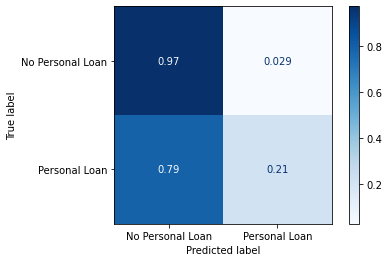

In [43]:
Model_features(X_train , y_train , X_test , y_test  , y_pred , knn , "Knn Classifier")   
confusion_matrix_plot(X_test , y_test , knn , "Knn Classifier")

#### Random Forest Classifier

In [44]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf.score(X_test , y_test) 

0.9915151515151515

Accuracy Score is :0.992
Precision Score is :0.992
Recall Score is :0.929
f1  Score is :0.958
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1480
           1       0.99      0.93      0.96       170

    accuracy                           0.99      1650
   macro avg       0.99      0.96      0.98      1650
weighted avg       0.99      0.99      0.99      1650



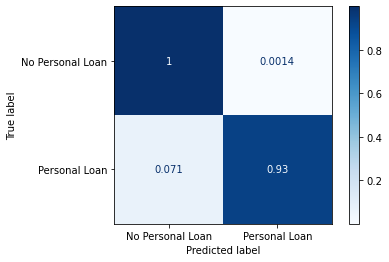

In [45]:
Model_features(X_train , y_train , X_test , y_test  , y_pred , rf , "Random Forest Classifier")   
confusion_matrix_plot(X_test , y_test , rf , "Random Forest Classifier")

#### Support Vector Machine

In [46]:
svm = SVC(kernel='rbf', probability=True) 
svm.fit(X_train,y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred = svm.predict(X_test)
svm.score(X_test , y_test)  

0.9

Accuracy Score is :0.9
Precision Score is :0.9
Recall Score is :0.124
f1  Score is :0.203
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1480
           1       0.57      0.12      0.20       170

    accuracy                           0.90      1650
   macro avg       0.74      0.56      0.57      1650
weighted avg       0.87      0.90      0.87      1650



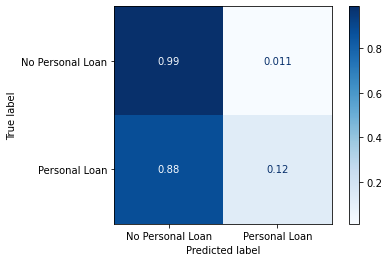

In [47]:
Model_features(X_train , y_train , X_test , y_test  , y_pred , svm , "Support Vector Machine")   
confusion_matrix_plot(X_test , y_test , svm , "Support Vector Machine")

#### DecisionTreeClassifier

In [48]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
dtc.score(X_test , y_test) 

0.9812121212121212

Accuracy Score is :0.981
Precision Score is :0.981
Recall Score is :0.9
f1  Score is :0.908
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1480
           1       0.92      0.90      0.91       170

    accuracy                           0.98      1650
   macro avg       0.95      0.95      0.95      1650
weighted avg       0.98      0.98      0.98      1650



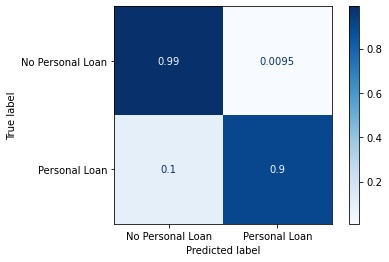

In [49]:
Model_features(X_train , y_train , X_test , y_test  , y_pred , dtc , "Decision Tree Classifier")   
confusion_matrix_plot(X_test , y_test , dtc , "Decision Tree Classifier")

In [50]:
dict = {'Model':model_list, 'Accuracy':accuracy_list , 'Precision':precision_list , 'f1_score':f1_score_list , 'Recall':recall_list}
model_df = pd.DataFrame(dict).sort_values(ascending = False , by = 'Accuracy')
model_df 

,Model,Accuracy,Precision,f1_score,Recall
2,Random Forest Classifier,0.992,0.992,0.958,0.929
4,Decision Tree Classifier,0.981,0.981,0.908,0.900
0,Logistic Reegression,0.967,0.967,0.822,0.747
3,Support Vector Machine,0.900,0.900,0.203,0.124
1,Knn Classifier,0.893,0.893,0.289,0.212
